In [1]:
import math

import numpy as np
from numpy.random import choice

import pandas as pd

from scipy.stats import gamma, expon
import matplotlib.pyplot as plt

%matplotlib inline

#### Gamma Distribution: a candidate for the Brand Points Distribution
For more info on Exponential Distribution, check the wikipedia. https://en.wikipedia.org/wiki/Gamma_distribution

In [2]:
# Parameters of the Distribution
shape=2
scale = 5
loc = 0

mean, var, skew, kurt = gamma.stats(a=shape,scale=scale, moments='mvsk')
print('average value: {},\nvariance: {}'.format(mean, var))

average value: 10.0,
variance: 50.0


Brand Points Distribution Graph


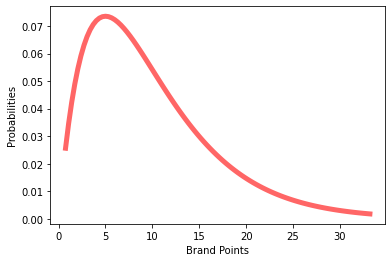

Average Brand Points: 10.0


In [3]:
# The graph of the pdf of the Gamma Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.01, a=shape, loc=loc, scale=scale),
                gamma.ppf(0.99, a=shape, loc=loc, scale=scale), 100)
ax.plot(x, gamma.pdf(x, a=shape, loc=loc, scale=scale),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print('Brand Points Distribution Graph')
plt.xlabel('Brand Points')
plt.ylabel('Probabilities')
plt.show()
print('Average Brand Points: {}'.format(mean))

#### Exponential Distribution: a candidate for the price premium rate
For more info on Exponential Distribution, check the wikipedia.
https://en.wikipedia.org/wiki/Exponential_distribution

In [4]:
## Parameters of Exponential Distribution
lmbd = 5             # lambda
scale = 1/lmbd       # scale
loc = 0              # location

mean, var, skew, kurt = expon.stats(scale=scale, loc=loc, moments='mvsk')
print('average value: {:5.2f},\nvariance: {:5.2f}'.format(mean, var))

average value:  0.20,
variance:  0.04


Price Premium Rate Distribution Graph


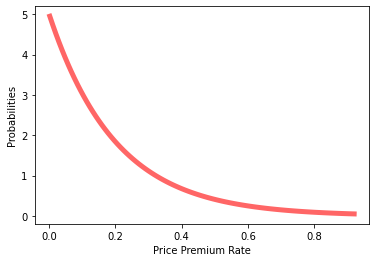

Average Premium Rate: 0.2


In [5]:
# The graph of the pdf of the Exponential Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01, scale=scale, loc=loc),
                expon.ppf(0.99, scale=scale, loc=loc), 100)
ax.plot(x, expon.pdf(x, scale=scale, loc=loc),
       'r-', lw=5, alpha=0.6, label='expon pdf')
print('Price Premium Rate Distribution Graph')
plt.xlabel('Price Premium Rate')
plt.ylabel('Probabilities')
plt.show()
print('Average Premium Rate: {}'.format(mean))

## Mature Community
- The community has matured enough that the Brand points are given by a **Gamma** distribution.
- And the price premium rates are given by an **exponential** distribution, independent of the Brand points.

| Input | Distribution |
| :-: | :-: |
| Brand Points | **Gamma Distribution** |
| Price Premium Rates | **Exponential Distribution** |

The following are the experiments on a variety of ways that "Brand points" influence the likelihood.

#### Case Study: quadratic Brand Points
$$
\mathrm{Likelihood Value} = \mathrm{Brand Points}^2 \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [9]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

| Input | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Exponential Distribution | lambda = 5 |

In [10]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
lambda_premium = 1
scale_premium = 1/lambda_premium
loc_premium = 1

In [11]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*expon.rvs(loc=loc_premium, scale=scale_premium, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**2 * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [12]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,2.011118,17.865368,3.423313e-04
premium_rate,0.401991,2.165127,2.000164e-01
likelihood,0.000200,0.007373,2.604895e-12


##### Selection of 100 tickets out of 5000

In [13]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

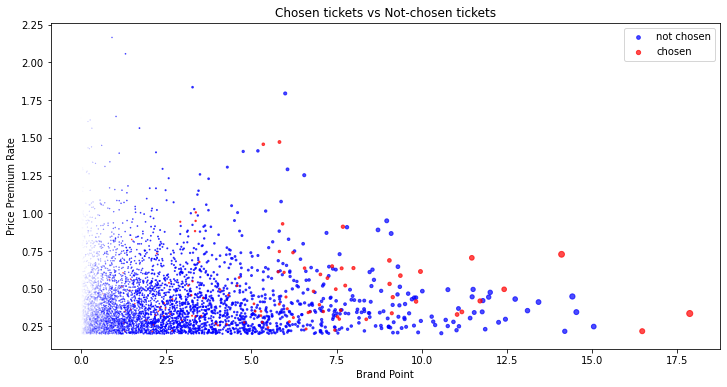

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [15]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                    
                mean        max       min         mean       max       min
result                                                                    
chosen      5.463957  17.865368  0.647302     0.483922  1.472302  0.217247
not chosen  1.940652  15.048059  0.000342     0.400318  2.165127  0.200016

##### Point Distribution of 'chosen'

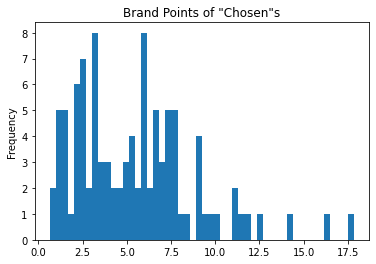

In [16]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

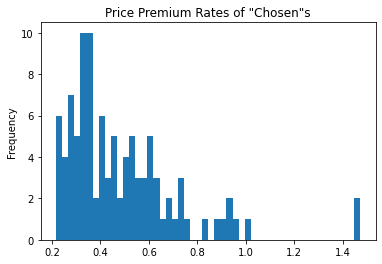

In [17]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [18]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

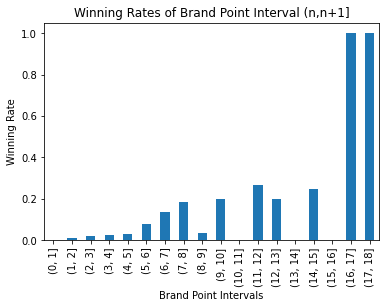

In [19]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [20]:
df_result_summary.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1984,1982,2,0.001008
"(1, 2]",1167,1156,11,0.009426
"(2, 3]",742,727,15,0.020216
"(3, 4]",459,447,12,0.026144
"(4, 5]",231,224,7,0.030303


#### Practical Cases: cubic
$$
\mathrm{Likelihood Value} = \mathrm{Brand Points}^3 \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [21]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Exponential Distribution | lambda = 5 |

In [22]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
lambda_premium = 1
scale_premium = 1/lambda_premium
loc_premium = 1

In [23]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*expon.rvs(loc=loc_premium, scale=scale_premium, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**3 * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [24]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,2.005947,17.091229,2.775048e-04
premium_rate,0.401088,2.227452,2.000137e-01
likelihood,0.000200,0.022923,9.649801e-17


##### Selection of 100 tickets out of 5000

In [25]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

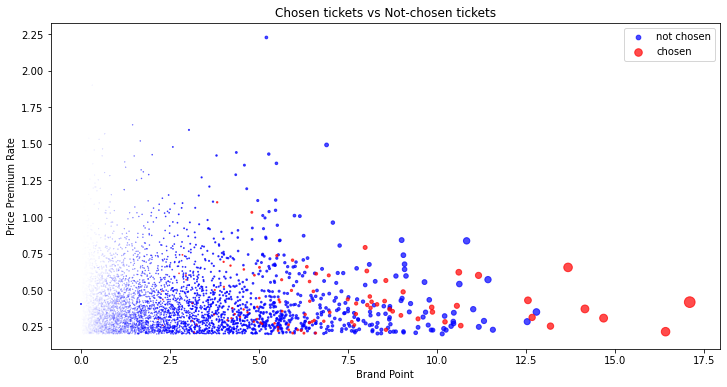

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [27]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                    
                mean        max       min         mean       max       min
result                                                                    
chosen      6.681500  17.091229  1.042803     0.419674  1.100344  0.205580
not chosen  1.910528  12.786865  0.000278     0.400708  2.227452  0.200014

##### Point Distribution of 'chosen'

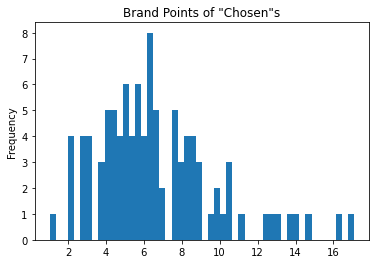

In [28]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

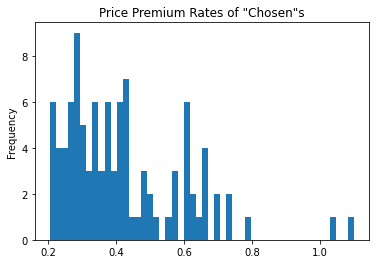

In [29]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [30]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

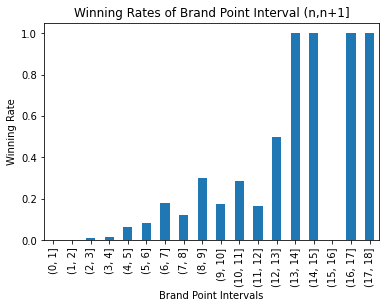

In [31]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [32]:
df_result_summary#.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1972,1972,0,0.000000
"(1, 2]",1175,1174,1,0.000851
"(2, 3]",714,706,8,0.011204
"(3, 4]",450,443,7,0.015556
"(4, 5]",252,236,16,0.063492
"(5, 6]",205,188,17,0.082927
"(6, 7]",89,73,16,0.179775
"(7, 8]",50,44,6,0.120000
"(8, 9]",40,28,12,0.300000
"(9, 10]",23,19,4,0.173913


#### Practical Cases: exponential

$$
\mathrm{Likelihood Value} = \exp\big(Brand Points\big) \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [33]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Exponential Distribution | lambda = 5 |

In [34]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
lambda_premium = 1
scale_premium = 1/lambda_premium
loc_premium = 1

In [35]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*expon.rvs(loc=loc_premium, scale=scale_premium, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values =np.exp(Points) * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [36]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,2.002157,18.639680,2.058612e-04
premium_rate,0.399995,1.736792,2.000152e-01
likelihood,0.000200,0.768196,4.744572e-09


##### Selection of 100 tickets out of 5000

In [37]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

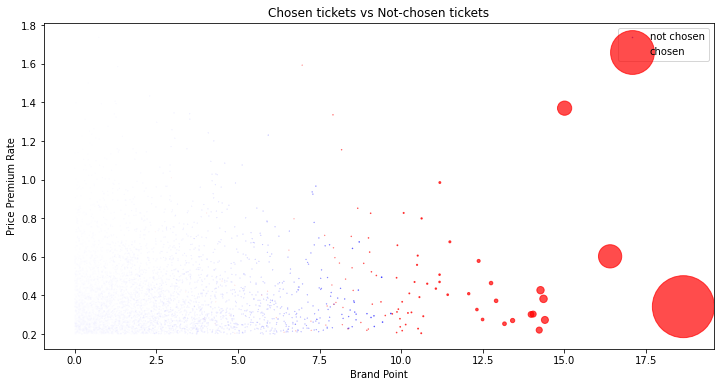

In [38]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [39]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                    
                mean        max       min         mean       max       min
result                                                                    
chosen      9.238730  18.639680  0.834049     0.467835  1.592918  0.203404
not chosen  1.854472   9.683089  0.000206     0.398610  1.736792  0.200015

##### Point Distribution of 'chosen'

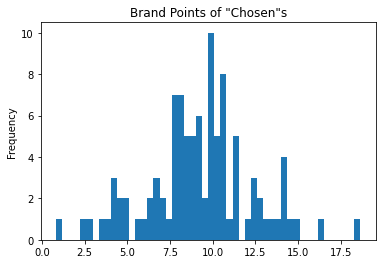

In [40]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

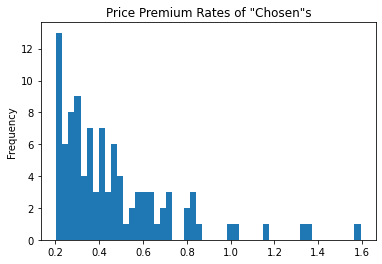

In [41]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [42]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

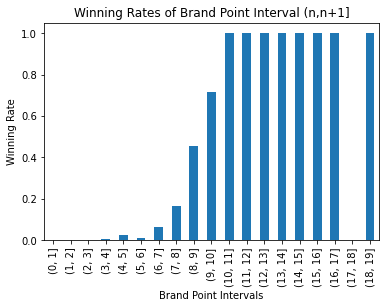

In [43]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [44]:
df_result_summary#.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1983,1982,1,0.000504
"(1, 2]",1209,1209,0,0.000000
"(2, 3]",703,701,2,0.002845
"(3, 4]",440,438,2,0.004545
"(4, 5]",254,247,7,0.027559
"(5, 6]",159,157,2,0.012579
"(6, 7]",96,90,6,0.062500
"(7, 8]",61,51,10,0.163934
"(8, 9]",35,19,16,0.457143
"(9, 10]",21,6,15,0.714286
